# 다음 분기에 어떤 게임을 출시해야 할까?

- 알아보고자 하는 것
    - 지역에 따라서 선호하는 게임 장르가 다를까?
    - 연도별 게임의 트렌드가 있을까?
    - 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 🕹️ Data Description


- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import missingno as msno

In [2]:
# Dataset upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CodeStates/Section1/개인프로젝트/vgames2.csv')
df.drop(df.columns[0], axis = 1, inplace = True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 결측치 확인

In [4]:
for col in df.columns:
    msg = 'column {:<10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df[col].isnull().sum() / len(df[col])))
    print(msg)

column Name      	 Percent of NaN value : 0.00%
column Platform  	 Percent of NaN value : 0.00%
column Year      	 Percent of NaN value : 1.63%
column Genre     	 Percent of NaN value : 0.30%
column Publisher 	 Percent of NaN value : 0.35%
column NA_Sales  	 Percent of NaN value : 0.00%
column EU_Sales  	 Percent of NaN value : 0.00%
column JP_Sales  	 Percent of NaN value : 0.00%
column Other_Sales	 Percent of NaN value : 0.00%


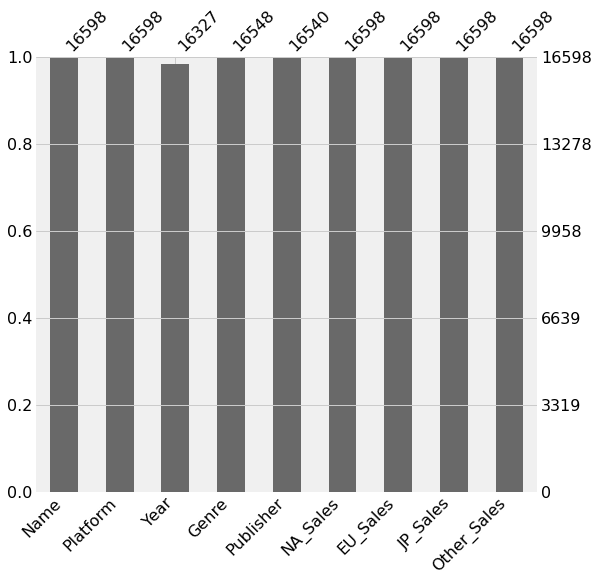

In [5]:
msno.bar(df, figsize=(8,8))
plt.show()

In [6]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

> `Year`, `Genre` 에서 결측치 확인  
> 결측값을 다른값으로 대체할 수 없고 많은 편이 아니므로 제거함

In [7]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

> `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales` 가 object type으로 되어있음  
> 확인해보니, 값에 `K, M`과 같은 문자열이 함께 섞여있음  
>**단위를 통일하고 숫자형으로 변경하기 위해 처리가 필요함**

In [8]:
# 판매량의 K와 M 문자열 처리
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval)
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].replace({'K': '*0.001', 'M': ""}, regex=True).map(pd.eval))

In [9]:
# 전세계 판매량을 반영하기 위해, 새로운 feature 생성
df["Total_Sales"] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB


# EDA

## 1. Platform

In [11]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

> Platform의 종류가 다양하나, 크게 휴대용, 콘솔, PC로 나눌수 있다.  
> 휴대용기기, 콘솔, PC로 category를 변경한다

In [12]:
df["Platform_Groups"] = np.where(df.Platform == "PC", "PC", \
                                 np.where((df.Platform == "3DS") | (df.Platform == "DS") | (df.Platform == "GB") | \
                                          (df.Platform == "GBA") | (df.Platform == "GG") | (df.Platform == "PSP") |  \
                                          (df.Platform == "PSV") | (df.Platform == "WS"), "Portable", "Console"))

df['Platform_Groups'].head()

0    Portable
1     Console
2    Portable
3    Portable
4     Console
Name: Platform_Groups, dtype: object

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

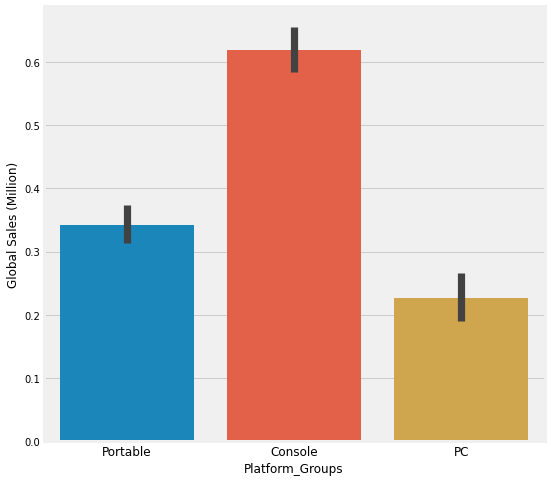

In [13]:
# Platform에 따른 전세계 판매량 비교
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Platform_Groups', y='Total_Sales', data= df[df['Year']>=2000])
ax.set_ylabel('Global Sales (Million)')
plt.xticks(fontsize=12)

> 콘솔게임의 전세계 판매량이 제일 많다

Text(0.5, 0, ' ')

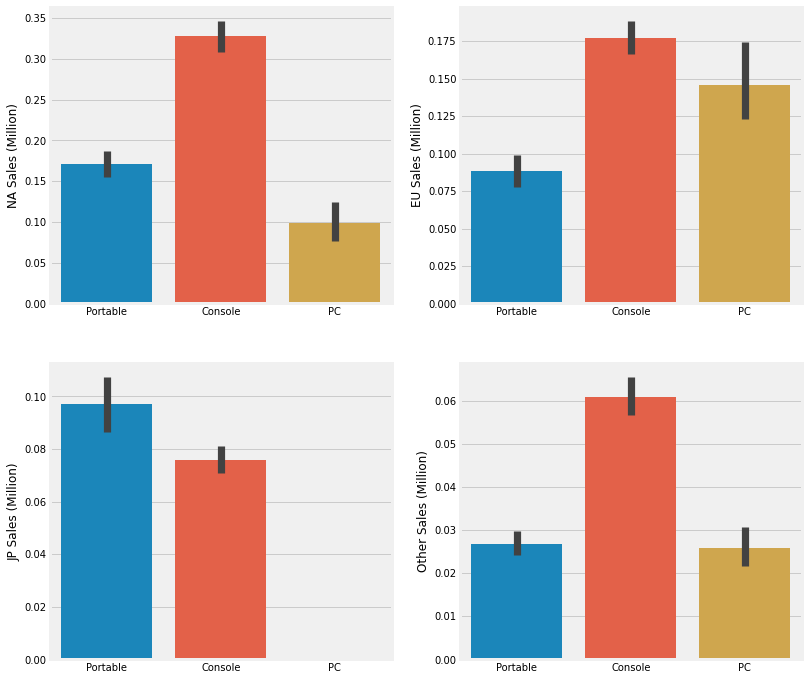

In [14]:
# Platform에 따른 각 지역 판매량 비교
f, ax = plt.subplots(2,2, figsize=(12, 12))
sns.barplot(x = 'Platform_Groups', y='NA_Sales', data=df, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel(' ')

sns.barplot(x = 'Platform_Groups', y='EU_Sales', data=df, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel(' ')

sns.barplot(x = 'Platform_Groups', y='JP_Sales', data=df, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel(' ')

sns.barplot(x = 'Platform_Groups', y='Other_Sales', data=df, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel(' ')

- 북미 지역과 기타지역의 경우, 콘솔기기 게임의 판매량이 높다 
- 유럽 지역은 콘솔 게임와 PC 게임 판매량이 비슷하다.
- 일본 지역은 오히려 휴대용 기기 게임의 판매량이 높다
- 전체적인 판매량은 북미지역이 많다

- 멀티플랫폼으로 출시한 게임에 대한 특성 생성
    - 대형 AAA급 게임의 경우는, 콘솔, PC에서 모두 플레이 할 수 있는 멀티플랫폼 게임을 출시하는 경우가 많다.
    - 멀티플랫폼으로 출시된 경우도 매출에 영향을 줄 수 있으므로, 특성을 생성해 시각화 한다

In [15]:
df["Multiplatform"] = df.duplicated(["Name"], keep=False) # 중복된 모든 행에 True 표시
df["Multiplatform"] = df["Multiplatform"].map({True: 1, False:0})
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups,Multiplatform
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Portable,1
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Console,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Portable,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Portable,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Console,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Console,1
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Portable,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Console,1
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,Portable,1


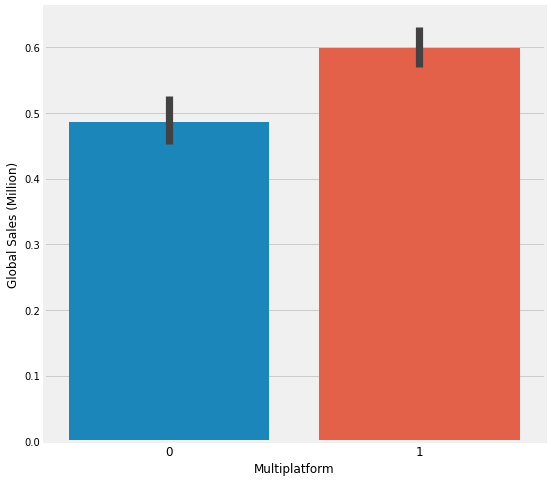

In [16]:
# 멀티플랫폼에 따른 총 판매량 비교
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Multiplatform', y='Total_Sales', data=df)
ax.set_ylabel('Global Sales (Million)')
plt.xticks(fontsize=12)
plt.show()

- 멀티플랫폼으로 출시한 게임의 판매량이 더 높다

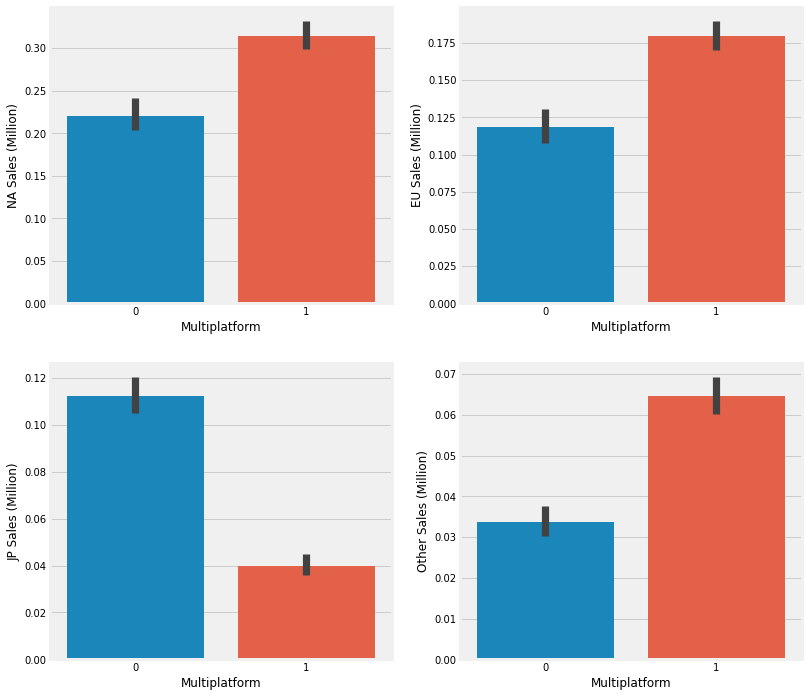

In [63]:
# 멀티플랫폼에 따른 각 지역 판매량 비교
f, ax = plt.subplots(2,2, figsize=(12, 12))
sns.barplot(x = 'Multiplatform', y='NA_Sales', data=df, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel('Multiplatform')

sns.barplot(x = 'Multiplatform', y='EU_Sales', data=df, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel('Multiplatform')

sns.barplot(x = 'Multiplatform', y='JP_Sales', data=df, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel('Multiplatform')

sns.barplot(x = 'Multiplatform', y='Other_Sales', data=df, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel('Multiplatform')


plt.show()

- 일본 지역을 제외하고는, 멀티플랫폼으로 출시한 게임의 판매량이 높다

## 2. Year

In [18]:
df['Year'].value_counts()

2009.0    1420
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 61, dtype: int64

> 2자리로 이루어진 값들을 확인, 이를 histogram으로 확인

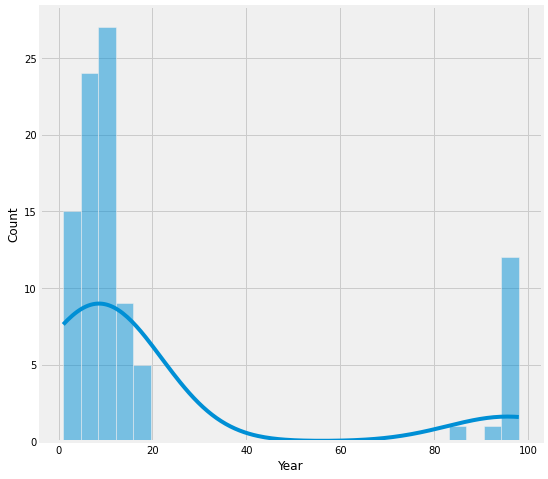

In [19]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.histplot(x = df[(df['Year'] <= 100)]['Year'], kde=True)
plt.show()

- Year의 2자리 연도를 4자리로 일괄처리
    - 20 이하 : 2000년대를 의미하므로, 앞에 `20`을 추가
    - 80 이상 : 1900년대를 의미하므로, 앞에 `19`를 추가

In [20]:
index_correct_year = list(df[(df['Year'] < 100)].index)

for i in index_correct_year:
    if df['Year'].iloc[i] <= 20 :
        df['Year'].iloc[i] = df['Year'].iloc[i] + 2000
    
    elif df['Year'].iloc[i] >= 80 :
        df['Year'].iloc[i] = df['Year'].iloc[i] + 1900

df['Year'] = df['Year'].astype(int)

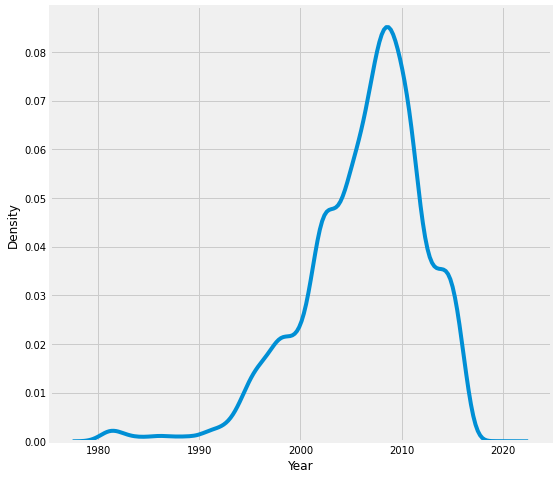

In [21]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.kdeplot('Year', data=df)
plt.show()

> dataset의 대부분이 2000 ~ 2010년대 게임들이다

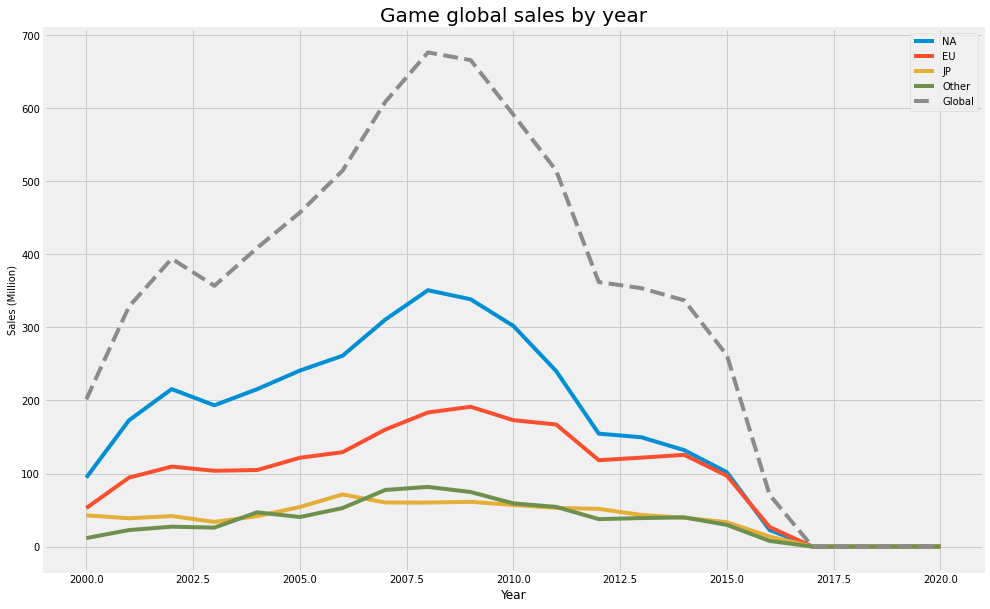

In [22]:
#2000년대 이후에 출시된 게임들의 전세계 판매량, 각 지역에 따른 판매량 비교
subset_year = df.groupby(by="Year").sum()
subset_year.drop("Multiplatform", axis=1 ,inplace=True)
subset_year = subset_year[subset_year.index >= 2000] # 2000년대 이후 출시된 게임

plt.figure(figsize = (15,10))
ax = plt.gca()
plt.plot(subset_year.index, subset_year[subset_year.columns[0]], label = "NA")
plt.plot(subset_year.index, subset_year[subset_year.columns[1]], label = "EU")
plt.plot(subset_year.index, subset_year[subset_year.columns[2]], label = "JP")
plt.plot(subset_year.index, subset_year [subset_year.columns[3]], label = "Other")
plt.plot(subset_year.index, subset_year[subset_year.columns[4]], '--',label = "Global")

plt.legend(loc='best')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (Million)', fontsize = 10)
plt.title('Game global sales by year', fontsize = 20)
plt.show()

- 전체적으로 북미 게임 판매량이 제일 많으며, 그 다음으로는 유럽 지역의 게임 판매량이 많다.
- 북미 시장과 유럽시장이 주를 이루므로, 이 지역을을 Target으로 하는 것이 좋다.

## 3. Genre

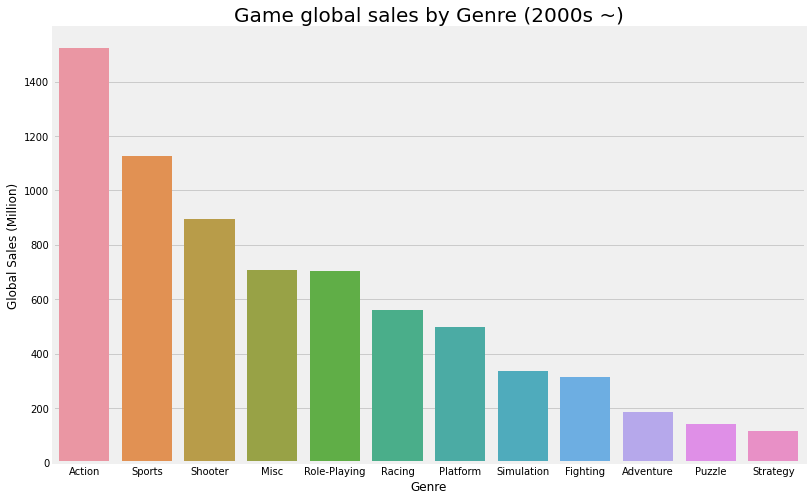

In [23]:
subset = df[df['Year']>=2000].groupby('Genre').sum().sort_values(by='Total_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()

plt.figure(figsize = (12,8))
ax = plt.gca()
sns.barplot(x="Genre", y="Total_Sales", order = genre_order, data=subset)
ax.set_ylabel("Global Sales (Million)")
plt.title('Game global sales by Genre (2000s ~)', fontsize = 20)
plt.show()

> 2000년 이후 출시된 게임 중, 전세계적으로 많이 팔린 게임 장르는 `Action` 장르이다

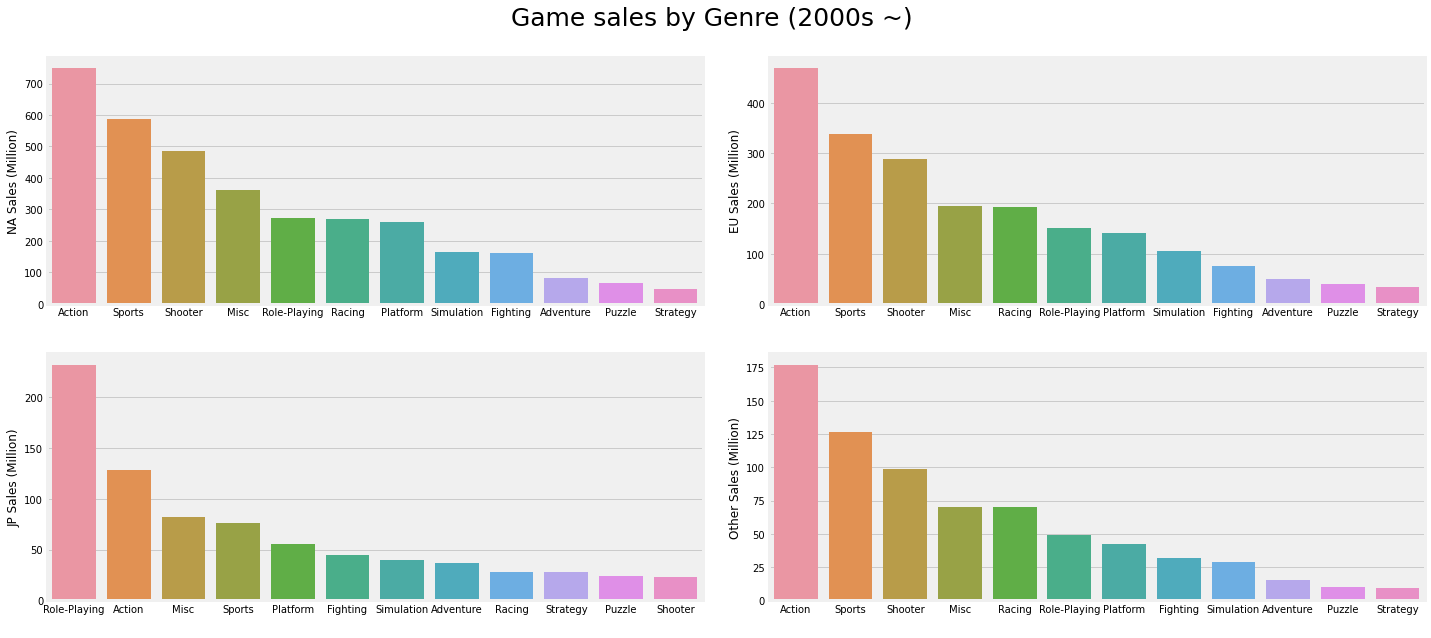

In [24]:
# 게임 장르에 따른 각 지역 판매량 비교
f, ax = plt.subplots(2,2, figsize=(22, 10))

subset = df[df['Year']>=2000].groupby('Genre').sum().sort_values(by='NA_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='NA_Sales', order = genre_order, data=subset, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel(' ')

subset = df[df['Year']>=2000].groupby('Genre').sum().sort_values(by='EU_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='EU_Sales', order = genre_order, data=subset, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel(' ')

subset = df[df['Year']>=2000].groupby('Genre').sum().sort_values(by='JP_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='JP_Sales', order = genre_order, data=subset, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel(' ')


subset = df[df['Year']>=2000].groupby('Genre').sum().sort_values(by='Other_Sales', ascending=False)
genre_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Genre', y='Other_Sales', order = genre_order, data=subset, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel(' ')

f.suptitle('Game sales by Genre (2000s ~)', fontsize=25, y=0.95)
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

- 2000년 이후 출시된 게임들의 장르별 각 지역 판매량
    -  북미, 유럽, 그외 지역은 `Action`, `Sports`, `Shooter`  장르가 많이 팔렸다
    - 일본은 `Role-Playing`, `Action`, `Misc` 장르가 많이 팔렸다

## Publisher


In [25]:
df[df['Year']>=2000]['Publisher'].value_counts() 

Electronic Arts                 1224
Activision                       908
Ubisoft                          894
Namco Bandai Games               836
Konami Digital Entertainment     696
                                ... 
Tripwire Interactive               1
RED Entertainment                  1
Athena                             1
Ertain                             1
NDA Productions                    1
Name: Publisher, Length: 456, dtype: int64

- 전체 데이터셋에서 Publisher 종류가 너무 많아서, 게임 판매량 Top 100 중 Publisher를 살펴보기로 함

### 전세계 매출 Top 100 (2000년대 이후)

In [26]:
# 전세계 매출 Top 100
df_global_100 = df[df['Year']>=2000].sort_values(by='Total_Sales', ascending=False)
df_global_100 = df_global_100.drop_duplicates(["Name"], keep = 'first')  # Multiplatform game의 경우, 판매량이 제일 많은 platform만 남기고 제외
df_global_100.reset_index(drop = True,inplace=True)
df_global_100 = df_global_100.head(100)
df_global_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_Groups,Multiplatform
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Console,0
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,Console,0
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Console,0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Portable,0
4,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,Console,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gears of War 3,X360,2011,Shooter,Microsoft Game Studios,4.05,1.62,0.07,0.49,6.23,Console,0
96,Gears of War,X360,2006,Shooter,Microsoft Game Studios,3.54,1.90,0.07,0.60,6.11,Console,1
97,Metal Gear Solid 2: Sons of Liberty,PS2,2001,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05,Console,0
98,Metal Gear Solid 4: Guns of the Patriots,PS3,2008,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03,Console,0


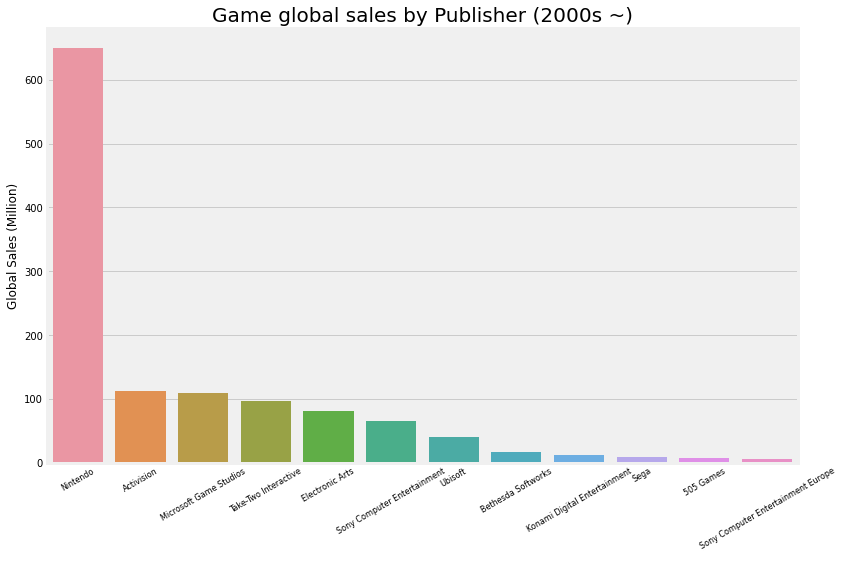

In [27]:
subset = df_global_100.groupby('Publisher').sum().sort_values(by='Total_Sales', ascending=False)
publisher_order =  subset.index.to_list()
subset = subset.reset_index()

plt.figure(figsize = (12,8))
ax = plt.gca()
sns.barplot(x='Publisher', y='Total_Sales', data=subset, order=publisher_order)
ax.set_ylabel("Global Sales (Million)")
ax.set_xlabel(' ')

ax.set_xticklabels(publisher_order, rotation=30, fontsize = 8)
plt.title('Game global sales by Publisher (2000s ~)', fontsize = 20)
plt.show()

- Nintendo 사의 게임 판매량이 압도적으로 많다
- 그 다음으로는 Activision, Microsoft 게임의 판매량이 많다

### 각 매출 Top 100 (2000년대 이후)

In [28]:
# 북미 매출 Top 100
df_NA_100 = df[df['Year']>=2000].sort_values(by='NA_Sales', ascending=False)
df_NA_100 = df_NA_100.drop_duplicates(["Name"], keep = 'first')  # Multiplatform game의 경우, 판매량이 제일 많은 platform만 남기고 제외
df_NA_100.reset_index(drop = True,inplace=True)
df_NA_100 = df_NA_100.head(100)

# 유럽 매출 Top 100
df_EU_100 = df[df['Year']>=2000].sort_values(by='EU_Sales', ascending=False)
df_EU_100 = df_EU_100.drop_duplicates(["Name"], keep = 'first')  # Multiplatform game의 경우, 판매량이 제일 많은 platform만 남기고 제외
df_EU_100.reset_index(drop = True,inplace=True)
df_EU_100 = df_EU_100.head(100)

# 일본 매출 Top 100
df_JP_100 = df[df['Year']>=2000].sort_values(by='JP_Sales', ascending=False)
df_JP_100 = df_JP_100.drop_duplicates(["Name"], keep = 'first')  # Multiplatform game의 경우, 판매량이 제일 많은 platform만 남기고 제외
df_JP_100.reset_index(drop = True,inplace=True)
df_JP_100 = df_JP_100.head(100)

# 그외 지역 매출 Top 100
df_Other_100 = df[df['Year']>=2000].sort_values(by='Other_Sales', ascending=False)
df_Other_100 = df_Other_100.drop_duplicates(["Name"], keep = 'first')  # Multiplatform game의 경우, 판매량이 제일 많은 platform만 남기고 제외
df_Other_100.reset_index(drop = True,inplace=True)
df_Other_100 = df_Other_100.head(100)

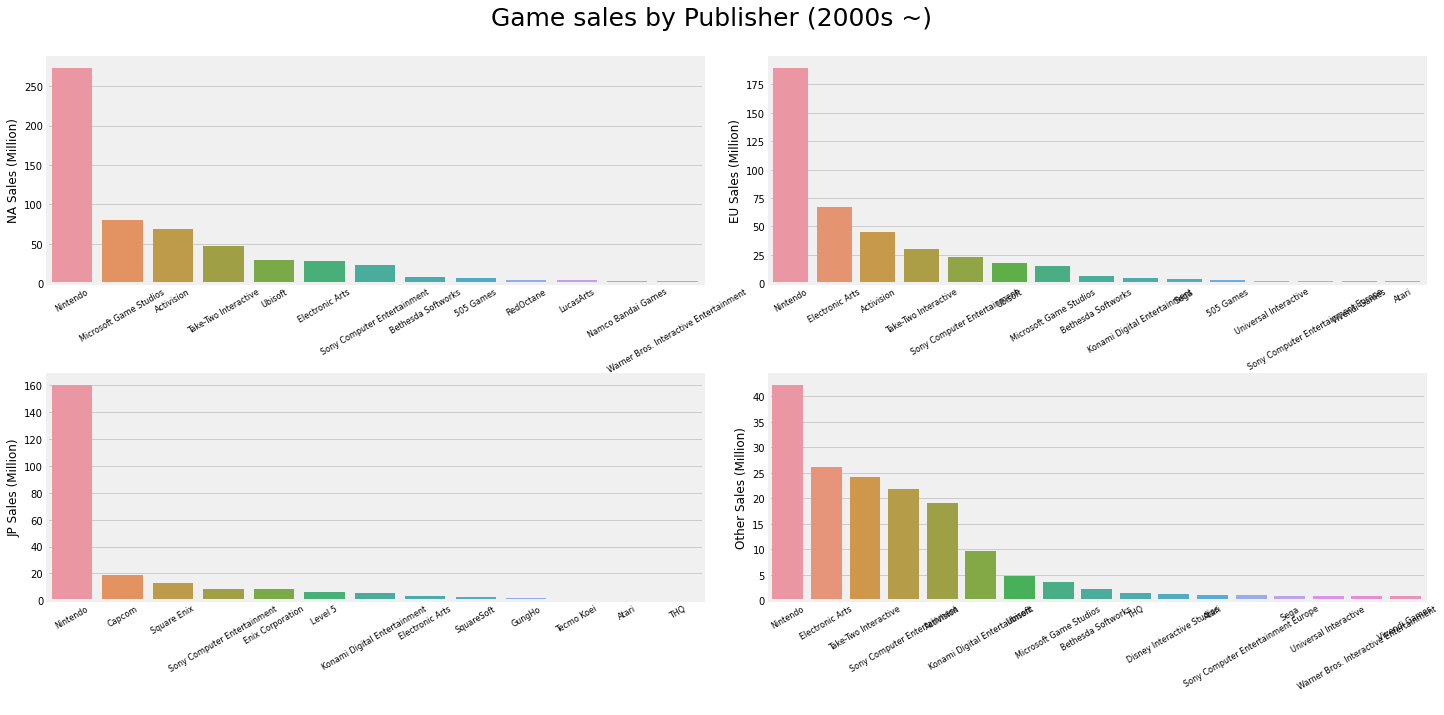

In [29]:
# 게임 출시회사에 따른 각 지역 판매량 비교
f, ax = plt.subplots(2,2, figsize=(22, 10))

subset = df_NA_100.groupby('Publisher').sum().sort_values(by='NA_Sales', ascending=False)
publisher_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Publisher', y='NA_Sales', data=subset, order = publisher_order, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel(' ')
ax[0,0].set_xticklabels(publisher_order, rotation=30, fontsize = 8)

subset = df_EU_100.groupby('Publisher').sum().sort_values(by='EU_Sales', ascending=False)
publisher_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x='Publisher', y='EU_Sales', data=subset, order=publisher_order, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel(' ')
ax[0,1].set_xticklabels(publisher_order, rotation=30, fontsize = 8)

subset = df_JP_100.groupby('Publisher').sum().sort_values(by='JP_Sales', ascending=False)
publisher_order =  subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Publisher', y='JP_Sales', order = publisher_order, data=subset, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel(' ')
ax[1,0].set_xticklabels(publisher_order, rotation=30, fontsize = 8)

subset = df_Other_100.groupby('Publisher').sum().sort_values(by='Other_Sales', ascending=False)
publisher_order = subset.index.to_list()
subset = subset.reset_index()
sns.barplot(x = 'Publisher', y='Other_Sales', order = publisher_order, data=subset, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel(' ')
ax[1,1].set_xticklabels(publisher_order, rotation=30, fontsize = 8)

f.suptitle('Game sales by Publisher (2000s ~)', fontsize=25, y=0.95)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.show()

- 2000년 이후 출시된 게임들의 Publisher별 각 지역 판매량
    - 북미 지역은 `Nintendo`, `Microsoft`, `Activision` 게임이 많이 팔렸음
    - 유럽 지역은  `Nintendo`, `EA (Electronic Arts)`, `Activision` 게임이 많이 팔렸음
    - 일본은  `Nintendo`, `Capcom`, `Square Enix` 게임이 많이 팔렸음
    - 그 외지역은 `Nintendo`, `EA`, `Take-Two` 게임이 많이 팔렸음
    - 일본은 판매량이 높은 Publisher가 **일본 내에 있는 게임회사**임

## Platform, Year

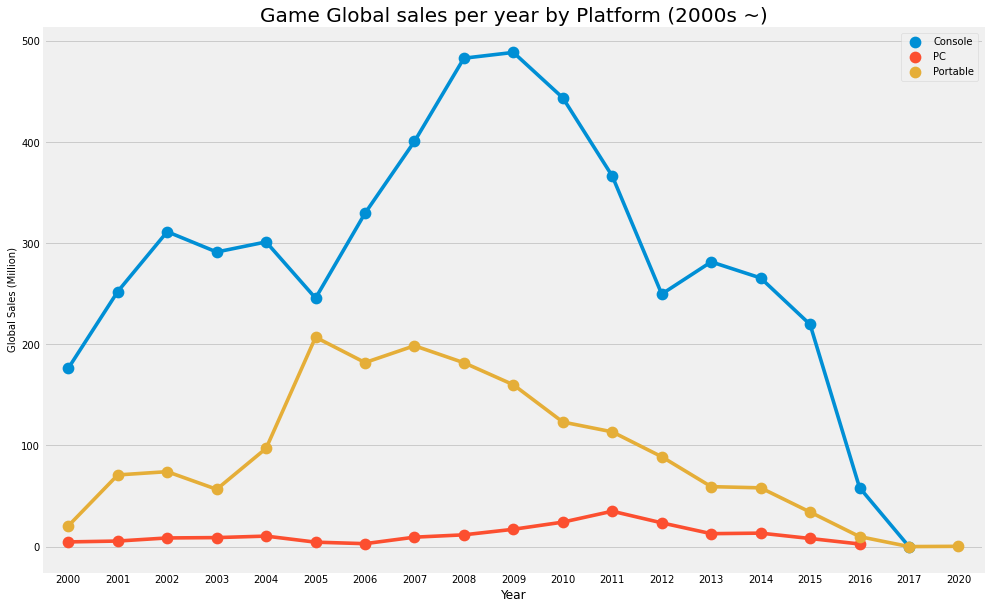

In [30]:
#2000년대 이후에 출시된 게임들의 전세계 판매량, 각 지역에 따른 판매량 비교
subset_year_platform = df[df['Year']>=2000].groupby(by=["Year",'Platform_Groups']).sum()
subset_year_platform = subset_year_platform.reset_index()

plt.figure(figsize = (15,10))
ax = plt.gca()
sns.pointplot(x = 'Year', y='Total_Sales', hue = 'Platform_Groups', scale = .5, data=subset_year_platform)

plt.legend(loc='best')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Global Sales (Million)', fontsize = 10)
plt.title('Game Global sales per year by Platform (2000s ~)', fontsize = 20)

plt.show()

- 전세계적으로 보았을 때, **콘솔 게임**이 게임 시장의 주요한 Platform이며, 그 다음으론 휴대용 기기이다.
- 2005년도에 휴대용 기기용 게임의 판매량이 최고치에 달한 후, 점차 감소하고있다.


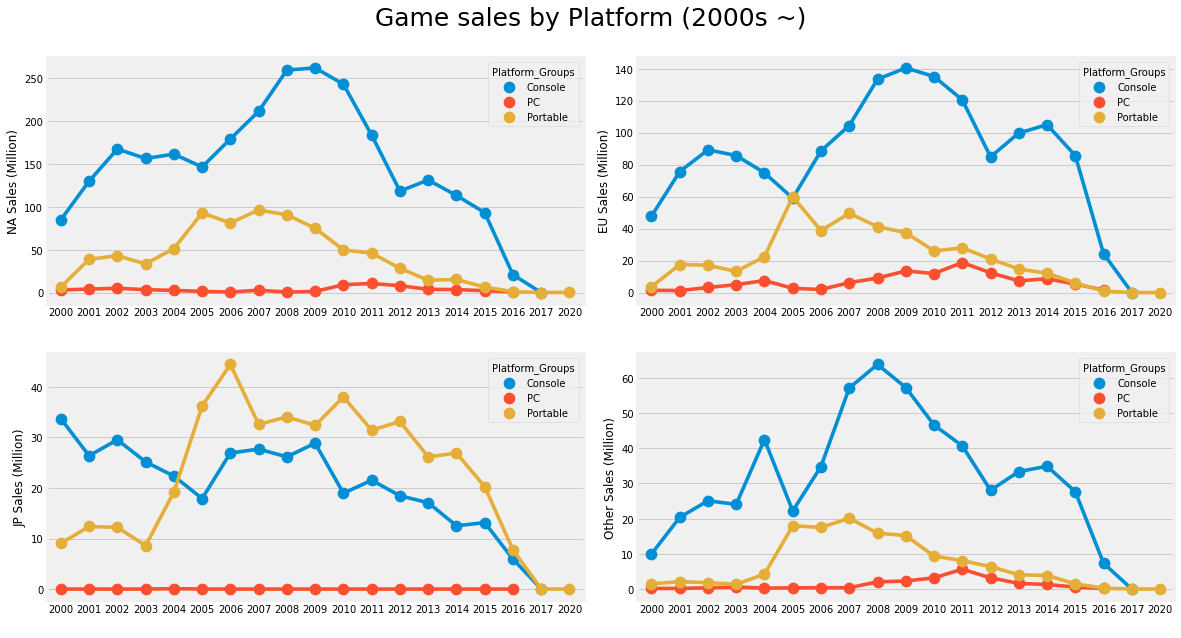

In [31]:
fig , ax = plt.subplots(2,2, figsize=(18,10))
sns.pointplot(x = 'Year', y='NA_Sales', hue = 'Platform_Groups',  scale  = .5, data=subset_year_platform, ax=ax[0,0])
ax[0,0].set_ylabel('NA Sales (Million)')
ax[0,0].set_xlabel(' ')

sns.pointplot(x = 'Year', y='EU_Sales', hue = 'Platform_Groups', scale = .5, data=subset_year_platform, ax=ax[0,1])
ax[0,1].set_ylabel('EU Sales (Million)')
ax[0,1].set_xlabel(' ')

sns.pointplot(x = 'Year', y='JP_Sales', hue = 'Platform_Groups', scale = .5, data=subset_year_platform, ax=ax[1,0])
ax[1,0].set_ylabel('JP Sales (Million)')
ax[1,0].set_xlabel(' ')

sns.pointplot(x = 'Year', y='Other_Sales', hue = 'Platform_Groups', scale = .5, data=subset_year_platform, ax=ax[1,1])
ax[1,1].set_ylabel('Other Sales (Million)')
ax[1,1].set_xlabel(' ')

fig.suptitle('Game sales by Platform (2000s ~)', fontsize=25, y=0.95)
plt.subplots_adjust(hspace=0.2, wspace = 0.1)
plt.show()

- 북미, 유럽, 그외 지역은 **콘솔 게임**이 게임 시장의 대부분을 차지하나, 일본지역은 **휴대용 기기 게임**이 콘솔 게임을 앞선다
- 일본 지역을 타겟으로하여 게임을 출시할 경우, 휴대용 기기를 염두하여 출시할 필요가 있다.

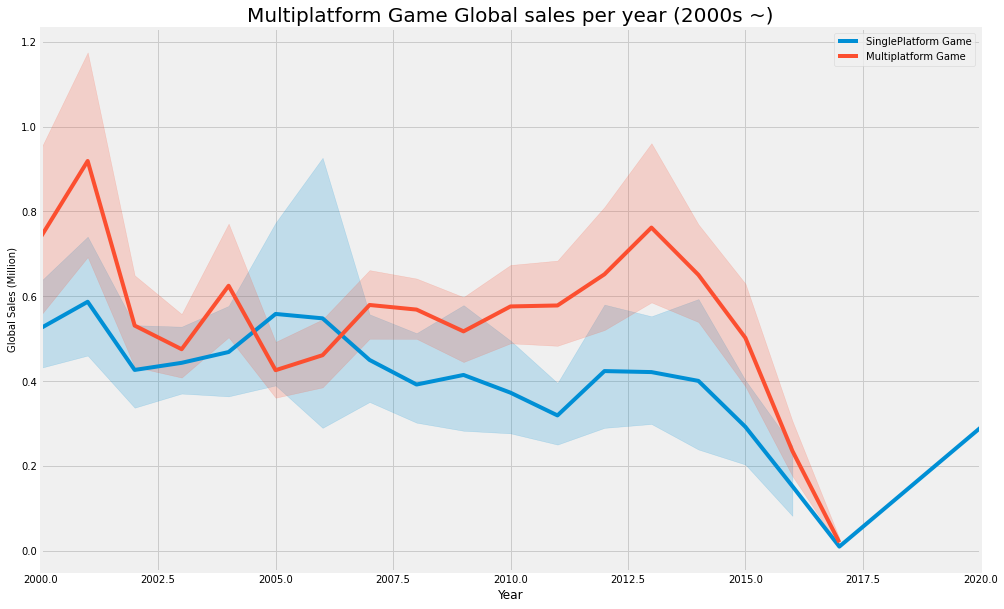

In [32]:
plt.figure(figsize = (15,10))
ax = plt.gca()
sns.lineplot(x='Year', y='Total_Sales', data=df[df['Year']>=2000], hue='Multiplatform')
ax.set_xlim(2000, 2020)

plt.legend(loc='best',labels = ['SinglePlatform Game', 'Multiplatform Game'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Global Sales (Million)', fontsize = 10)
plt.title('Multiplatform Game Global sales per year (2000s ~)', fontsize = 20)

plt.show()

- 대부분의 해에서 싱글 플랫폼 게임보다 **멀티 플랫폼** 게임의 전세계 판매량이 높다

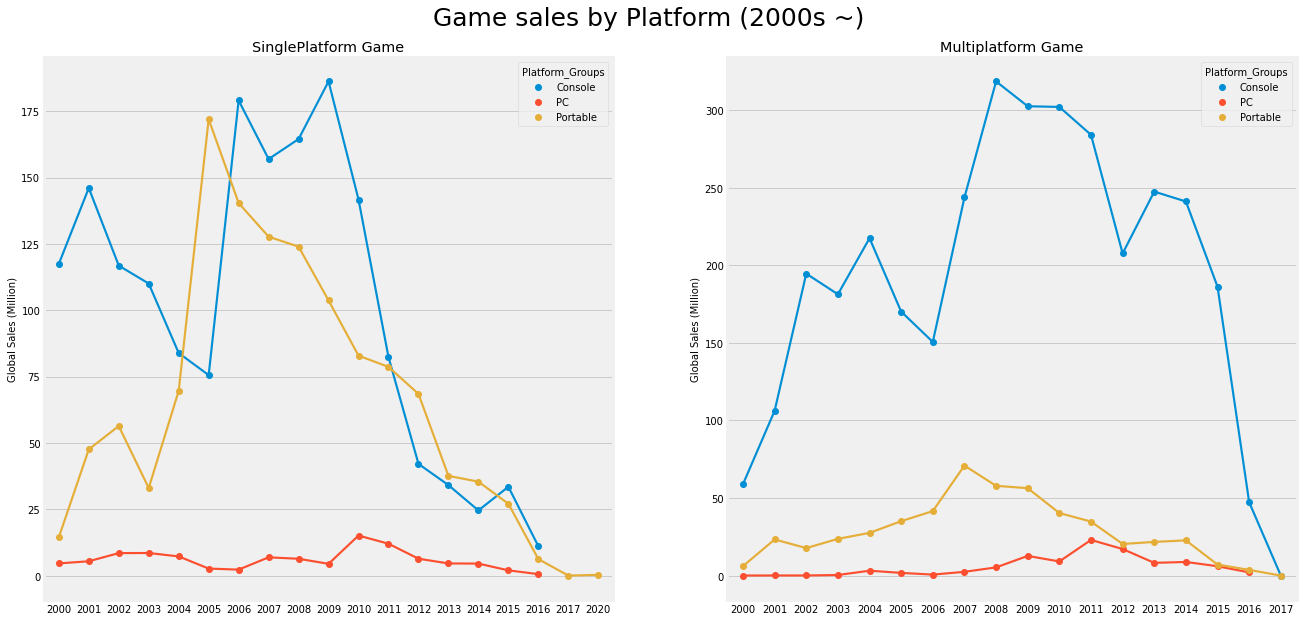

In [33]:
subset_year_multiplatform = df[df['Year']>=2000].groupby(by=["Year",'Platform_Groups','Multiplatform']).sum() #2000년대 이후 출시게임
subset_year_multiplatform = subset_year_multiplatform.reset_index()

fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.pointplot(x = 'Year', y='Total_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Global Sales (Million)', fontsize = 10)
ax[0].set_title('SinglePlatform Game')

sns.pointplot(x = 'Year', y='Total_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('Global Sales (Million)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('Game sales by Platform (2000s ~)', fontsize=25, y=0.95)
plt.show()

- 싱글 플랫폼게임의 경우, 2000 ~ 2004년도를 제외하곤 콘솔게임과 휴대용 기기 게임의 판매량이 비슷하다.
- 멀티 플랫폼으로 출시된 게임은 압도적으로 콘솔게임 판매량이 높다
> 휴대용 기기 게임의 출시를 염두하고 있다면, 싱글 플랫폼으로 출시하는 편이 매출에 도움이 될 수 있다  
> 반대로 콘솔 게임의 출시를 염두하고 있다면, 멀티 플랫폼으로 출시하는 편이 매출에 도움이 될 수 있다

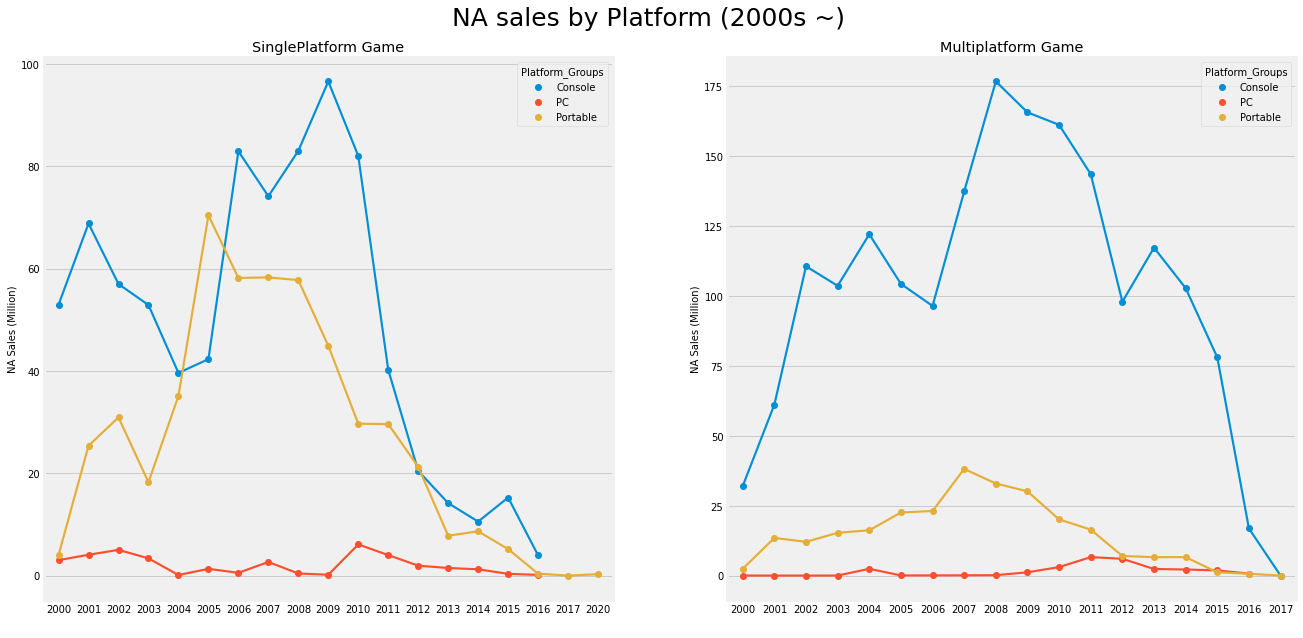

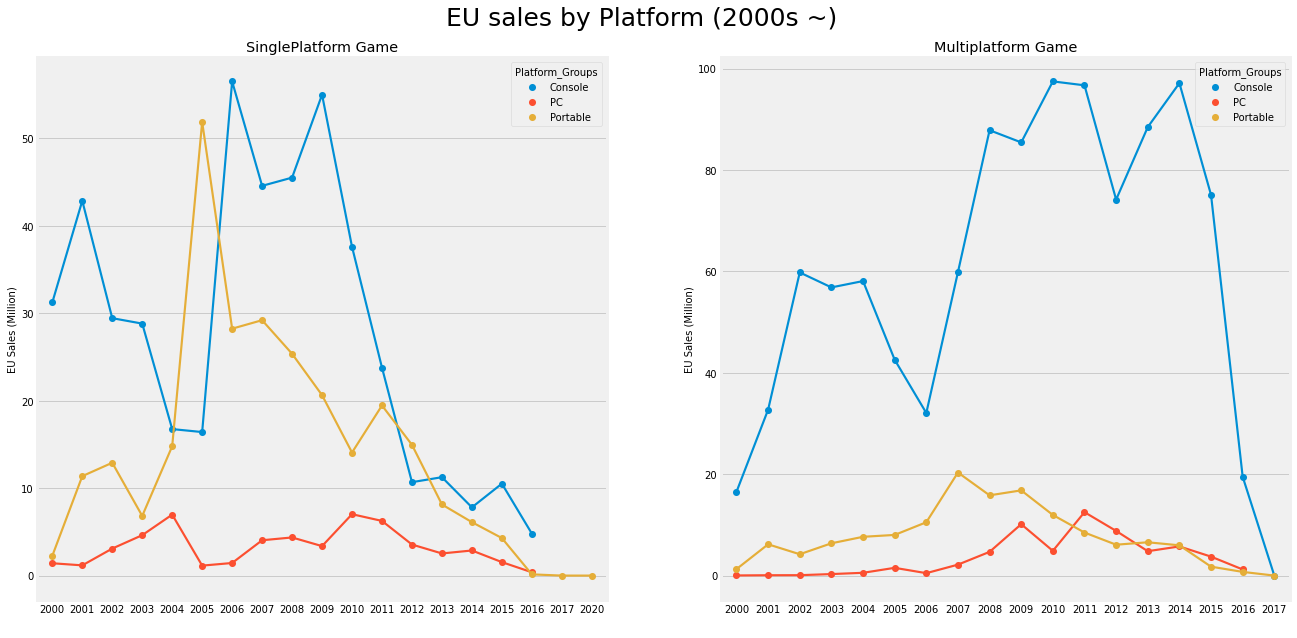

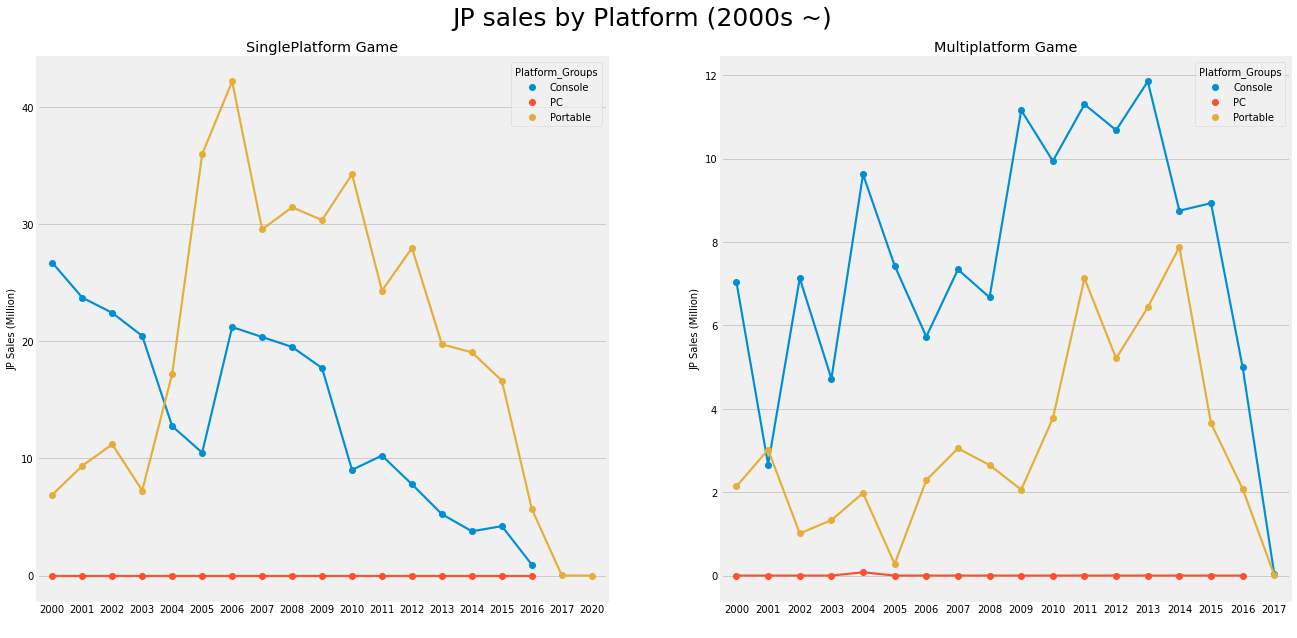

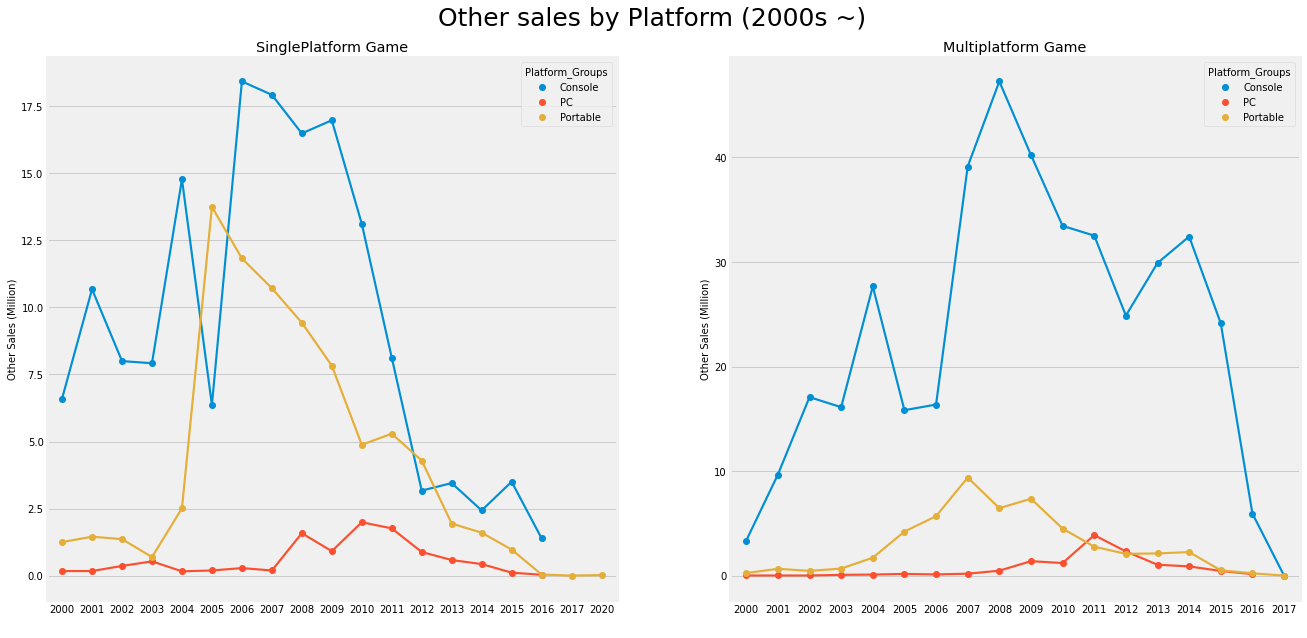

In [34]:
# 북미지역 판매량
fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.pointplot(x = 'Year', y='NA_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('NA Sales (Million)', fontsize = 10)
ax[0].set_title('SinglePlatform Game')

sns.pointplot(x = 'Year', y='NA_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('NA Sales (Million)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('NA sales by Platform (2000s ~)', fontsize=25, y=0.95)
plt.show()

# 유럽지역 판매량
fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.pointplot(x = 'Year', y='EU_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('EU Sales (Million)', fontsize = 10)
ax[0].set_title('SinglePlatform Game')

sns.pointplot(x = 'Year', y='EU_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('EU Sales (Million)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('EU sales by Platform (2000s ~)', fontsize=25, y=0.95)
plt.show()

# 일본지역 판매량
fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.pointplot(x = 'Year', y='JP_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('JP Sales (Million)', fontsize = 10)
ax[0].set_title('SinglePlatform Game')

sns.pointplot(x = 'Year', y='JP_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('JP Sales (Million)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('JP sales by Platform (2000s ~)', fontsize=25, y=0.95)
plt.show()

# 그외지역 판매량
fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.pointplot(x = 'Year', y='Other_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Other Sales (Million)', fontsize = 10)
ax[0].set_title('SinglePlatform Game')

sns.pointplot(x = 'Year', y='Other_Sales', hue = 'Platform_Groups', scale = .3, data=subset_year_multiplatform[subset_year_multiplatform['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('Other Sales (Million)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('Other sales by Platform (2000s ~)', fontsize=25, y=0.95)
plt.show()

- 일본을 제외한 북미, 유럽, 그 외지역의 경우, 싱글플랫폼 게임은 콘솔게임과 휴대용 기기 게임의 판매량이 비슷하거나 콘솔게임 판매량이 더 많다
- 일본의 경우, 싱글플랫폼 게임은 휴대용 기기 게임의 판매량이 압도적으로 많다.
- 멀티 플랫폼 게임의 경우, 모든 지역에서 콘솔 게임 판매량이 압도적으로 많다

## Genre, Year

### Global

In [47]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre =  df[df['Year']>=2000].groupby(['Year','Genre']).sum()['Total_Sales'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre[subset_year_genre['Year'] == i].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'Total_Sales']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'Total_Sales'])
df_year_genre

,Year,Genre,Total_Sales
0,2000,Sports,41.24
1,2001,Action,56.68
2,2002,Action,86.65
3,2003,Action,67.98
4,2004,Action,76.15
5,2005,Action,85.52
6,2006,Sports,136.12
7,2007,Action,105.99
8,2008,Action,135.46
9,2009,Sports,138.59


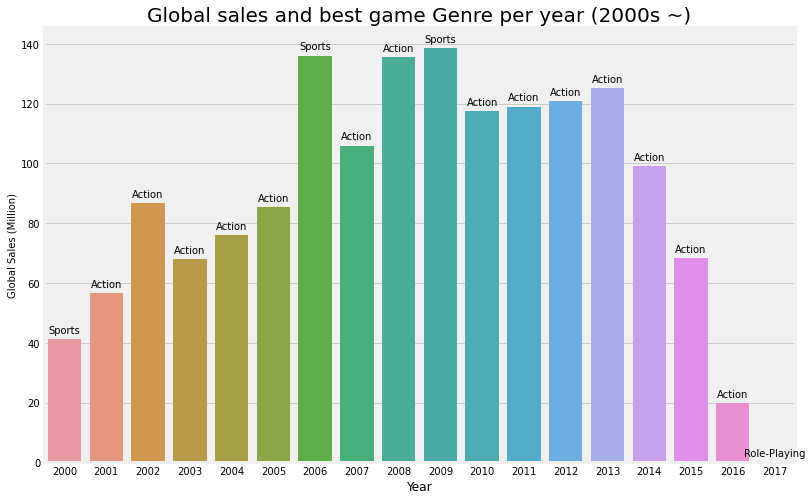

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='Total_Sales', data=df_year_genre)

# for idx, value in df_year_genre.iterrows():
#     fig.text(value['Year'], (value['Total_Sales'])/2, str(value['Genre']), size=15,rotation=90)

for index, row in df_year_genre.iterrows():
    plt.text(index , row.Total_Sales + 2, str(row.Genre), color='black', ha="center", size=10)

plt.ylabel('Global Sales (Million)', fontsize = 10)
plt.title('Global sales and best game Genre per year (2000s ~)', fontsize = 20)
plt.show()

- 대부분의 해에서 Action 장르가 판매량이 높았음
- 간혹 Sports 장르의 판매량이 높을 때도 있었음 (2000, 2006, 2009년)

### 북미 지역

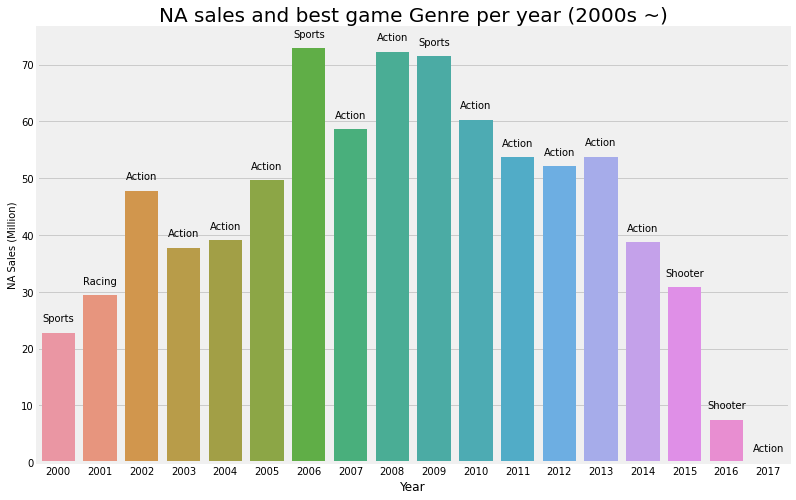

In [37]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre_NA =  df[df['Year']>=2000].groupby(['Year','Genre']).sum()['NA_Sales'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre_NA[subset_year_genre_NA['Year'] == i].sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'NA_Sales']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'NA_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='NA_Sales', data=df_year_genre)

for index, row in df_year_genre.iterrows():
    plt.text(index , row.NA_Sales + 2, str(row.Genre), color='black', ha="center", size=10)

plt.ylabel('NA Sales (Million)', fontsize = 10)
plt.title('NA sales and best game Genre per year (2000s ~)', fontsize = 20)
plt.show()

- 2015년, 2016년도에는 Shooter 장르가 판매량이 많았음
- 그 이전에는 Action 장르의 판매량이 높았으며, 일부해에서 Sports, Racing 장르의 판매량이 높았음
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

### 유럽 지역

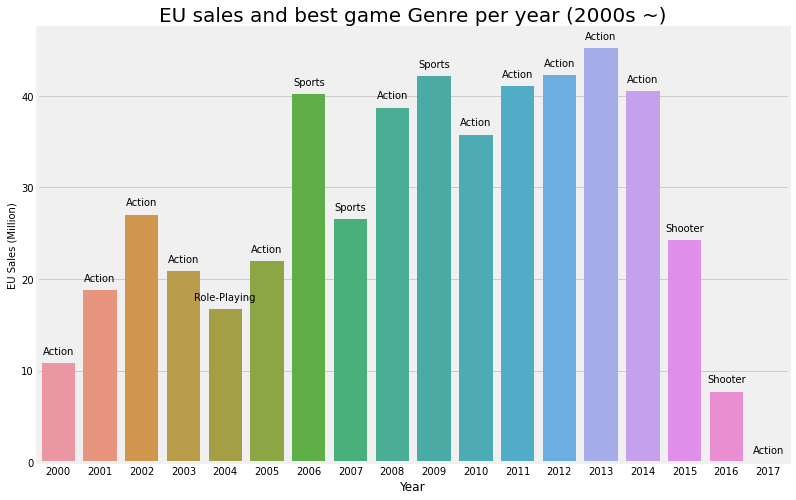

In [38]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre_EU =  df[df['Year']>=2000].groupby(['Year','Genre']).sum()['EU_Sales'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre_EU[subset_year_genre_EU['Year'] == i].sort_values(by='EU_Sales',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'EU_Sales']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'EU_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='EU_Sales', data=df_year_genre)

for index, row in df_year_genre.iterrows():
    plt.text(index , row.EU_Sales + 1, str(row.Genre), color='black', ha="center", size=10)

plt.ylabel('EU Sales (Million)', fontsize = 10)
plt.title('EU sales and best game Genre per year (2000s ~)', fontsize = 20)
plt.show()

- 2015년, 2016년도에는 Shooter 장르가 판매량이 많았음
- 그 이전에는 Action 장르의 판매량이 높았으며, 일부해에서 Sports, Role-Playing 장르의 판매량이 높았음
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

### 일본 지역

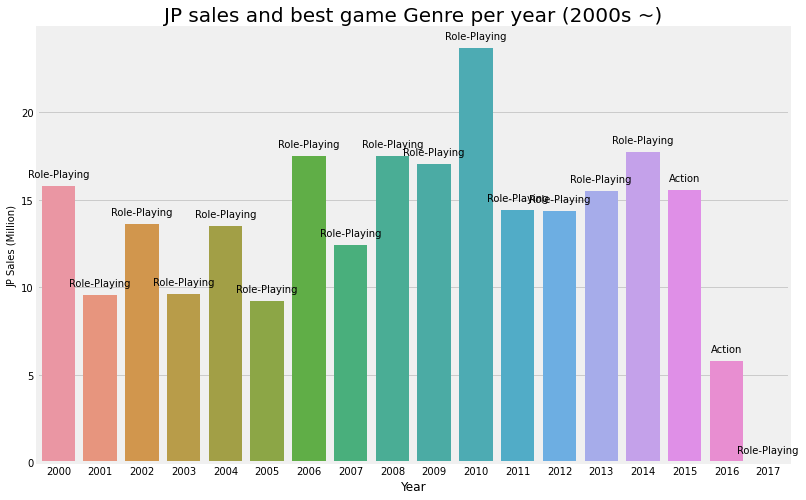

In [39]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre_JP =  df[df['Year']>=2000].groupby(['Year','Genre']).sum()['JP_Sales'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre_JP[subset_year_genre_JP['Year'] == i].sort_values(by='JP_Sales',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'JP_Sales']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'JP_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='JP_Sales', data=df_year_genre)

for index, row in df_year_genre.iterrows():
    plt.text(index , row.JP_Sales + 0.5, str(row.Genre), color='black', ha="center", size=10)

plt.ylabel('JP Sales (Million)', fontsize = 10)
plt.title('JP sales and best game Genre per year (2000s ~)', fontsize = 20)
plt.show()

- 2000년대 초반부터 2014년까지 Role-Playing 장르의 매출이 높았다
- 2015년도 이후부터는 Action 장르의 매출이 높아졌다
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

### 그 외지역

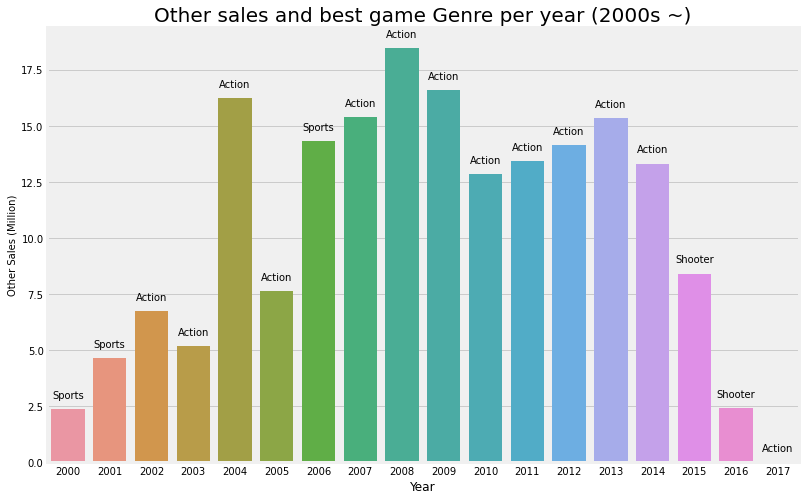

In [40]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre_Other =  df[df['Year']>=2000].groupby(['Year','Genre']).sum()['Other_Sales'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre_Other[subset_year_genre_Other['Year'] == i].sort_values(by='Other_Sales',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'Other_Sales']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'Other_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='Other_Sales', data=df_year_genre)

for index, row in df_year_genre.iterrows():
    plt.text(index , row.Other_Sales + 0.5, str(row.Genre), color='black', ha="center", size=10)

plt.ylabel('Other Sales (Million)', fontsize = 10)
plt.title('Other sales and best game Genre per year (2000s ~)', fontsize = 20)
plt.show()

- 2002 ~ 2014년도 까지는 **Action** 장르의 게임이 매출이 높았으나 (2006년도 제외), 2015년 이후에는 **Shooter** 장르의 매출이 높아졌다
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

## Publisher, Year

### Global

In [41]:
year_list = []
pub_list = []
sale_list = []

subset_year_pub =  df[df['Year']>=2000].groupby(['Year','Publisher']).sum()['Total_Sales'].reset_index()

for i in range(2000, 2018) :
    year_pub = subset_year_pub[subset_year_pub['Year'] == i].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)

    best_pub = year_pub.loc[0, 'Publisher']
    best_pub_sale =  year_pub.loc[0, 'Total_Sales']

    year_list.append(i)
    pub_list.append(best_pub)
    sale_list.append(best_pub_sale)
    
year_pub = pd.DataFrame((zip(year_list, pub_list, sale_list)), columns = ['Year', 'Publisher', 'Total_Sales'])
year_pub

,Year,Publisher,Total_Sales
0,2000,Nintendo,34.02
1,2001,Nintendo,45.41
2,2002,Electronic Arts,72.27
3,2003,Electronic Arts,69.78
4,2004,Electronic Arts,62.98
5,2005,Nintendo,127.37
6,2006,Nintendo,205.60
7,2007,Nintendo,104.16
8,2008,Nintendo,91.14
9,2009,Nintendo,128.86


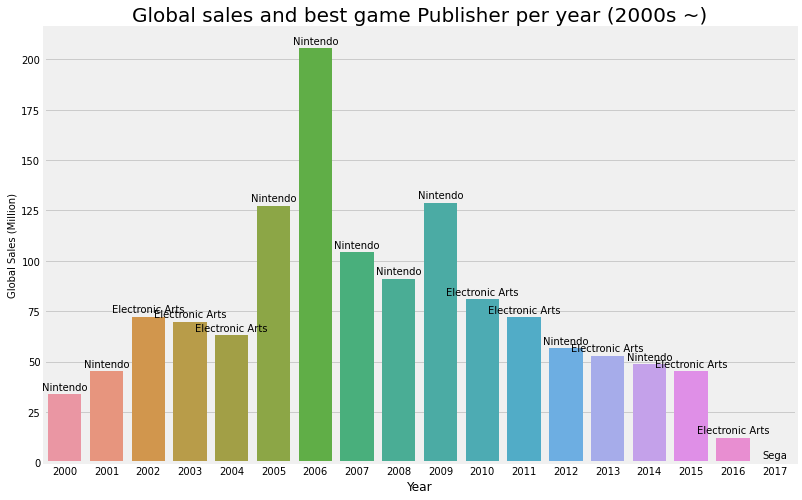

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='Total_Sales', data=year_pub)

for index, row in year_pub.iterrows():
    plt.text(index , row.Total_Sales + 2, str(row.Publisher), color='black', ha="center", size=10)

plt.ylabel('Global Sales (Million)', fontsize = 10)
plt.title('Global sales and best game Publisher per year (2000s ~)', fontsize = 20)
plt.show()

- 최근까지 Nintendo, Electronic Arts의 게임 판매량이 많았다
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

### 북미 지역

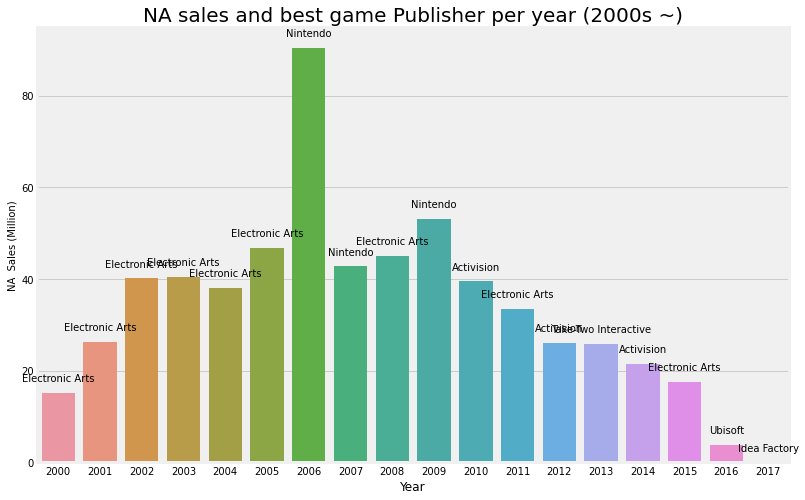

In [54]:
year_list = []
pub_list = []
sale_list = []

subset_year_pub =  df[df['Year']>=2000].groupby(['Year','Publisher']).sum()['NA_Sales'].reset_index()

for i in range(2000, 2018) :
    year_pub = subset_year_pub[subset_year_pub['Year'] == i].sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)

    best_pub = year_pub.loc[0, 'Publisher']
    best_pub_sale =  year_pub.loc[0, 'NA_Sales']

    year_list.append(i)
    pub_list.append(best_pub)
    sale_list.append(best_pub_sale)
    
year_pub = pd.DataFrame((zip(year_list, pub_list, sale_list)), columns = ['Year', 'Publisher', 'NA_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='NA_Sales', data=year_pub)

for index, row in year_pub.iterrows():
    plt.text(index , row.NA_Sales + 2.5, str(row.Publisher), color='black', ha="center", size=10)

plt.ylabel('NA  Sales (Million)', fontsize = 10)
plt.title('NA sales and best game Publisher per year (2000s ~)', fontsize = 20)
plt.show()

- 최근까지 Ubisoft, Electronic Arts, Activision, Take-Two 사의 게임이 많이 팔렸다
- 전세계를 대상으로 했을 때보다 다양한 게임제작사가 높은 매출을 기록했다
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

### 유럽 지역

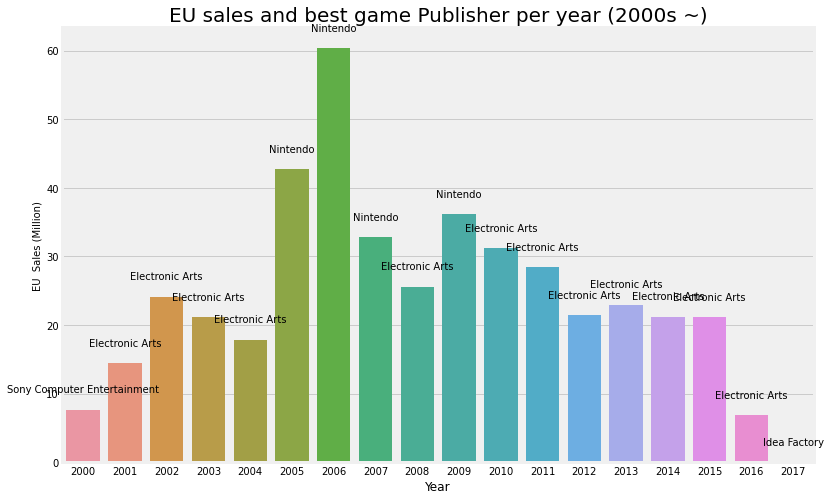

In [55]:
year_list = []
pub_list = []
sale_list = []

subset_year_pub =  df[df['Year']>=2000].groupby(['Year','Publisher']).sum()['EU_Sales'].reset_index()

for i in range(2000, 2018) :
    year_pub = subset_year_pub[subset_year_pub['Year'] == i].sort_values(by='EU_Sales',ascending=False).reset_index(drop=True)

    best_pub = year_pub.loc[0, 'Publisher']
    best_pub_sale =  year_pub.loc[0, 'EU_Sales']

    year_list.append(i)
    pub_list.append(best_pub)
    sale_list.append(best_pub_sale)
    
year_pub = pd.DataFrame((zip(year_list, pub_list, sale_list)), columns = ['Year', 'Publisher', 'EU_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='EU_Sales', data=year_pub)

for index, row in year_pub.iterrows():
    plt.text(index , row.EU_Sales + 2.5, str(row.Publisher), color='black', ha="center", size=10)

plt.ylabel('EU  Sales (Million)', fontsize = 10)
plt.title('EU sales and best game Publisher per year (2000s ~)', fontsize = 20)
plt.show()

- 최근까지 EA사의 게임이 높은 매출을 기록했다
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다

### 일본 지역

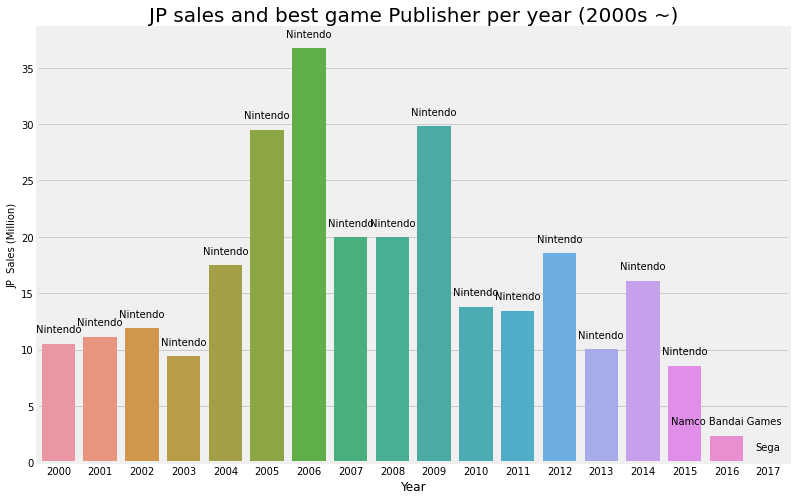

In [58]:
year_list = []
pub_list = []
sale_list = []

subset_year_pub =  df[df['Year']>=2000].groupby(['Year','Publisher']).sum()['JP_Sales'].reset_index()

for i in range(2000, 2018) :
    year_pub = subset_year_pub[subset_year_pub['Year'] == i].sort_values(by='JP_Sales',ascending=False).reset_index(drop=True)

    best_pub = year_pub.loc[0, 'Publisher']
    best_pub_sale =  year_pub.loc[0, 'JP_Sales']

    year_list.append(i)
    pub_list.append(best_pub)
    sale_list.append(best_pub_sale)
    
year_pub = pd.DataFrame((zip(year_list, pub_list, sale_list)), columns = ['Year', 'Publisher', 'JP_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='JP_Sales', data=year_pub)

for index, row in year_pub.iterrows():
    plt.text(index , row.JP_Sales + 1, str(row.Publisher), color='black', ha="center", size=10)

plt.ylabel('JP  Sales (Million)', fontsize = 10)
plt.title('JP sales and best game Publisher per year (2000s ~)', fontsize = 20)
plt.show()

- 최근까지 주로 Nintendo 사의 게임이 많이 팔렸으며, 2016년도에는 Namco 사의 게임이 많이 팔렸다.
- 일본 지역에서 휴대용 기기 게임이 많이 팔렸던 것을 염두하였을 때, 휴대용 기기를 대표하는 Nintendo사의 게임 판매량이 높은 것은 당연하다.


### 그 외지역

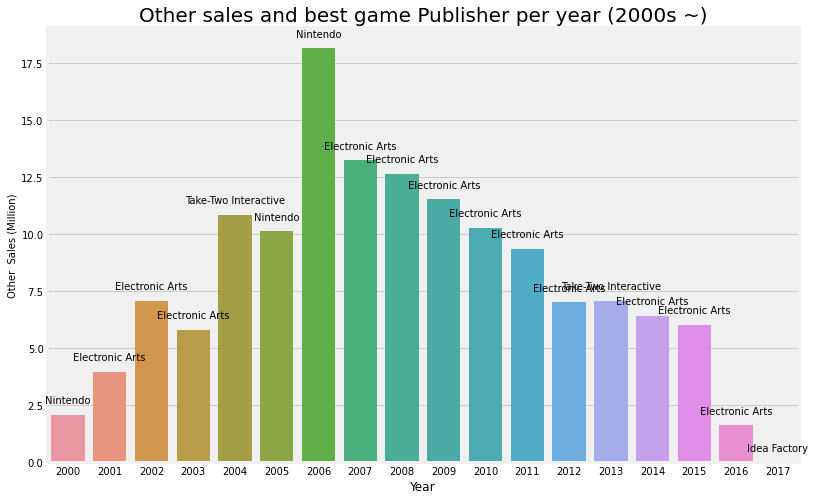

In [60]:
year_list = []
pub_list = []
sale_list = []

subset_year_pub =  df[df['Year']>=2000].groupby(['Year','Publisher']).sum()['Other_Sales'].reset_index()

for i in range(2000, 2018) :
    year_pub = subset_year_pub[subset_year_pub['Year'] == i].sort_values(by='Other_Sales',ascending=False).reset_index(drop=True)

    best_pub = year_pub.loc[0, 'Publisher']
    best_pub_sale =  year_pub.loc[0, 'Other_Sales']

    year_list.append(i)
    pub_list.append(best_pub)
    sale_list.append(best_pub_sale)
    
year_pub = pd.DataFrame((zip(year_list, pub_list, sale_list)), columns = ['Year', 'Publisher', 'Other_Sales'])

fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='Other_Sales', data=year_pub)

for index, row in year_pub.iterrows():
    plt.text(index , row.Other_Sales + 0.5, str(row.Publisher), color='black', ha="center", size=10)

plt.ylabel('Other  Sales (Million)', fontsize = 10)
plt.title('Other sales and best game Publisher per year (2000s ~)', fontsize = 20)
plt.show()

- 최근까지 EA사의 게임이 높은 매출을 기록했다
- 2017년도 데이터가 거의 없기에, 해석에서 제외하는 편이 좋다